## Importing Necessary libraries

In [34]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
import re
import pickle
from sklearn.model_selection import train_test_split

## Read the data

In [2]:
df = pd.read_csv('IMDB Dataset.csv')

In [3]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


## Preprocessing - NLP

In [4]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

There are no null values

Checking the target class balance

In [5]:
df.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

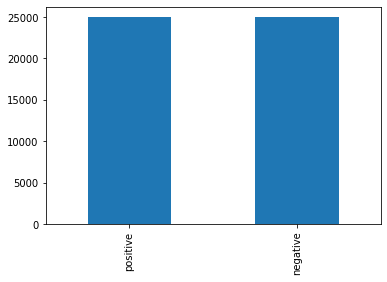

In [6]:
df.sentiment.value_counts().plot.bar()

Target class is balanced

Download the stopwords

In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### Creating Custom Stop words

In [8]:
english_nltk_stopwords = stopwords.words('english')

In [38]:
english_nltk_stopwords[0:25]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers']

In [13]:
words_to_skip = ["mightn't","needn't","needn't",
                 "haven't","hadn't","didn't",
                 "doesn't","hasn't","isn't","mustn't",
                 "aren't","couldn't","don't","no","not","nor",
                 "shouldn't","wasn't","weren't","wouldn't"]

In [14]:
custom_stop_words = [words for words in english_nltk_stopwords if words not in words_to_skip]

In [37]:
custom_stop_words [0:15]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours']

### Applying stemming after cleaning the text

In [27]:
stemmer = PorterStemmer()

def remove_SW_Stem(text):
    text=[stemmer.stem(words) for words in text.split(" ") if words not in custom_stop_words]
    return " ".join(text)

remove_html_tags = re.compile(r'<[^>]+>')
special_chars = re.compile('[^-9a-z#+_]')
add_space = re.compile('[/(){}\[\]\\@;]')

                             
def clean_text_stemmer(text):
    text = text.lower()
    text = remove_html_tags.sub(" ",text)
    text = add_space.sub(" ",text)
    text = special_chars.sub(" ",text)
    text = remove_SW_Stem(text)
    return text

In [28]:
df['cleaned_stemming'] = df['review'].apply(lambda text:clean_text_stemmer(text))

In [29]:
df['cleaned_stemming'].head()

0    one review mention watch   oz episod hook  rig...
1    wonder littl product    film techniqu unassumi...
2    thought wonder way spend time hot summer weeke...
3    basic famili littl boy  jake  think zombi clos...
4    petter mattei  love time money  visual stun fi...
Name: cleaned_stemming, dtype: object

### Applying lemmatization after cleaning the text

In [30]:
lemet = WordNetLemmatizer()

def remove_SW_Lemm(text):
  text = [lemet.lemmatize(words) for words in text.split(" ") if words not in custom_stop_words]
  return " ".join(text)

remove_html_tags = re.compile(r'<[^>]+>')
special_chars = re.compile('[^-9a-z#+_]')
add_space = re.compile('[/(){}\[\]\\@;]')
                             
def clean_text_lemmati(text):
    text = text.lower()
    text = remove_html_tags.sub(" ",text)
    text = add_space.sub(" ",text)
    text = special_chars.sub(" ",text)
    text = remove_SW_Lemm(text)
    return text

In [31]:
df['cleaned_lemmatize'] = df['review'].apply(lambda text:clean_text_lemmati(text))

In [22]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [24]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [32]:
df['cleaned_lemmatize'].head()

0    one reviewer mentioned watching   oz episode h...
1    wonderful little production    filming techniq...
2    thought wonderful way spend time hot summer we...
3    basically family little boy  jake  think zombi...
4    petter mattei  love time money  visually stunn...
Name: cleaned_lemmatize, dtype: object

In [39]:
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_lemmatize'], df['sentiment'], random_state=42, stratify=df['sentiment'], test_size=0.2)

### Apply Countvectorizer with one gram

In [42]:
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(df['cleaned_lemmatize'])
with open(r"preproc_count_vect.pkl", "wb") as output_file:
  pickle.dump(count_vect, output_file)

In [43]:
# transform the training and validation data 
xtrain_count =  count_vect.transform(X_train)
xtest_count =  count_vect.transform(X_test)

In [44]:
xtrain_count

<40000x91692 sparse matrix of type '<class 'numpy.int64'>'
	with 3871397 stored elements in Compressed Sparse Row format>

### Apply Countvectorizer with n gram

In [45]:
count_vect_ngram = CountVectorizer(ngram_range=(1,2))
count_vect_ngram.fit(df['cleaned_lemmatize'])
with open(r"preproc_count_vect_ngram.pkl", "wb") as output_file:
  pickle.dump(count_vect_ngram, output_file)

In [46]:
xtrain_count_ngram =  count_vect_ngram.transform(X_train)
xtest_count_ngram =  count_vect_ngram.transform(X_test)

### Apply TFIDF

In [48]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(df['cleaned_lemmatize'])
with open(r"preproc_tfidf_vect.pkl", "wb") as output_file:
  pickle.dump(tfidf_vect, output_file)

xtrain_tfidf =  tfidf_vect.transform(X_train)
xtest_tfidf =  tfidf_vect.transform(X_test)
print("word level tf-idf done")


word level tf-idf done


In [49]:
# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(df['cleaned_lemmatize'])
with open(r"preproc_tfidf_vect_ngram.pkl", "wb") as output_file:
  pickle.dump(tfidf_vect_ngram, output_file)

xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(X_train)
xtest_tfidf_ngram =  tfidf_vect_ngram.transform(X_test)
print("ngram level tf-idf done")


ngram level tf-idf done


In [50]:
# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char',  ngram_range=(2,3), max_features=5000) 
tfidf_vect_ngram_chars.fit(df['cleaned_lemmatize'])
with open(r"preproc_tfidf_vect_ngram_chars.pkl", "wb") as output_file:
  pickle.dump(tfidf_vect_ngram_chars, output_file)

xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_train) 
xtest_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_test) 
print("characters level tf-idf done")

characters level tf-idf done
